<a href="https://colab.research.google.com/github/nikita1128/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **Importing the required libraries**

In [ ]:
#Importing the required libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# **Loading the data file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
telecom = pd.read_csv('/content/drive/MyDrive/Alma/Pro/Capstone Project/Copy of Telecom Churn.csv')

# **Now while using the "head" and "tail" function we can see the top and bottom records.**

In [ ]:
#Using head() function to see first 5 records
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Using tail() function to see last 5 records
telecom.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


# **From the shape attribute, we can see the shape of the data i.e number of records and number of columns in the dataframe.**

In [ ]:
#shape of the dataframe
telecom.shape

(3333, 20)

In [ ]:
#Printing number of rows and coloumns present in dataframe
print ("Rows     : " ,telecom.shape[0])
print ("Columns  : " ,telecom.shape[1])

Rows     :  3333
Columns  :  20


# **Let’s see the columns(features) in our telecom dataframe.**

In [ ]:
#columns of the dataframe
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
#Printing the list of columns(features) in dataframe
print("Features: \n" ,telecom.columns.tolist())

Features: 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [ ]:
#Checking for the unique values in each column
print ("Unique values :\n",telecom.nunique())

Unique values :
 State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64


### From above we can see that there are 51 unique states and 3 unique area code.

In [ ]:
#Unique states in dataframe
print("Unique States: \n",telecom['State'].unique())

Unique States: 
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [ ]:
#Unique Area Codes in dataframe
print("Unique Area Code : ",telecom['Area code'].unique().tolist())

Unique Area Code :  [415, 408, 510]


# **Using describe() function to generate descriptive statistics of the data.**

In [ ]:
#generating descriptive statistics of the data
telecom.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Inference:

1. Number voice mail messages is ranging from 0 to 51. 
2. Only 25% of customers are using voice mail messages.
3. Average call minutes in evening and night are higher than the average call minutes in day but average day charge is higher than the charge in evening and night.
4. Maximum international call minutes are 20 only.

According to my hypothesis:

1. Customers prefer night calls due to lower charges.
2. Customers are not prefering international calls due to higher charges.
3. Corporation should consider lowering the call rates to increase the total number of calls.

# **Getting information about the DataFrame using info() method.**

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#Printing number of null(missing) values
print("Missing values :  ", telecom.isnull().sum().values.sum())

Missing values :   0


### From above we can see that there is no null(missing) value in our dataframe.

# **Variable Breakdown**

**STATE:** 51 Unique States.

**Account Length:** Length of the account


**Area Code:** 415 relates to San Francisco, 408 is of San Jose and 510 is of City of Oakland.


**International Plan:** 'Yes' indicates International Plan is present and 'No' indicates no subscription for International Plan.


**Voice Mail Plan:** 'Yes' indicates Voice Mail Plan is present and 'No' indicates no subscription for Voice Mail Plan.


**Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 51.


**Total day minutes:** Total number of Minutes spent by customers in morning.


**Total day calls:** Total number of Calls made by customer in morning.


**Total day charge:** Total charge to the customers in morning.


**Total eve minutes:** Total number of Minutes spent by customers in evening.


**Total eve calls:** Total number of Calls made by customer in evening.


**Total eve charge:** Total Charge to the customers in morning.


**Total night minutes:** Total number of Minutes spent by customers in the night.


**Total night calls:** Total number of Calls made by customer in night.


**Total night charge:** Total Charge to the customers in night.

**Total intl minutes:** Total number of Minutes spent by customers for International Calls.

**Total intl calls:** Total number of International Calls.

**Total intl charge:** Total Charge to the customers for International Calls.

**Customer service calls:** Total number of Customer Service Calls.

**Churn:** Target Variable

# **Checking the Churn Rate**

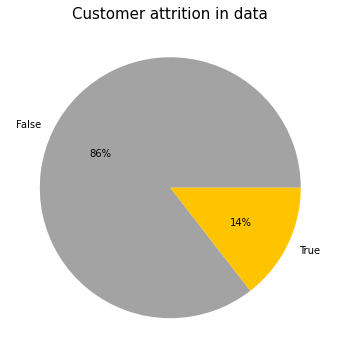

In [ ]:
#setting figure size
fig = plt.figure(figsize=(6,6))

#define Seaborn color palette to use
colors = sns.color_palette('bright')[7:10]

#create pie chart
plt.pie(telecom['Churn'].value_counts(), labels = telecom['Churn'].value_counts().keys().tolist(), colors = colors, autopct='%.0f%%')
plt.title("Customer attrition in data", fontsize= 15)
plt.show()

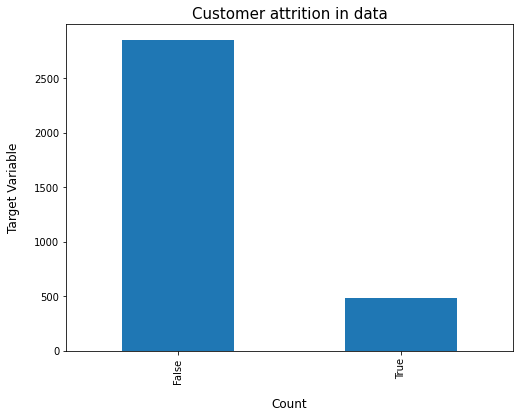

In [ ]:
# bar chart to display churn rate
telecom['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count", labelpad=14, fontsize = 12)
plt.ylabel("Target Variable", labelpad=14, fontsize = 12)
plt.title("Customer attrition in data", fontsize = 15)
plt.show()

In [ ]:
#Let’s see the value count of our target variable
telecom['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Inference:

1. From above observation, we can conclude that our dataset is not balanced i.e. True is 483(~14%) and False is 2850 ( ~86%).

2. So we will analyze the data with other features while taking the target values separately to get some insights.

3. Analysis shows that churn rate of the telecom company is 14%.

In [ ]:
#making copy of original dataframe to do further analysis
telecom_data = telecom.copy()

#Dropping Account Length as it doesn't make a sense here
telecom_data = telecom_data.drop('Account length',axis=1)
telecom_data.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# **Churn According to States**

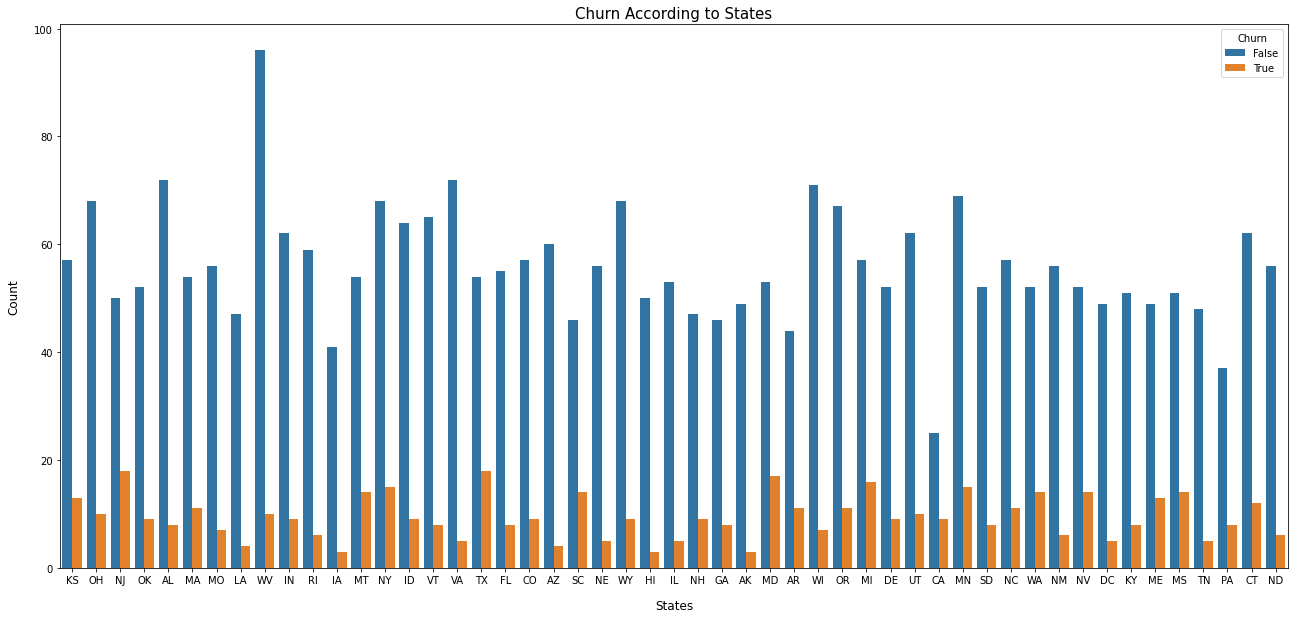

In [ ]:
#setting figure size
fig = plt.figure(figsize=(22,10))

#count plot to display Churn According to States
sns.countplot(data=telecom_data, x='State', hue='Churn')
plt.xlabel("States", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Churn According to States", fontsize = 15)
plt.show()

Inference:

1. New Jersey,Texas and Maryland have a bit more churn rate than usual.

According to my hypothesis:

1. Due to low network quality, network upgradation is suggested in these areas.


# **Churn According to Area Code**

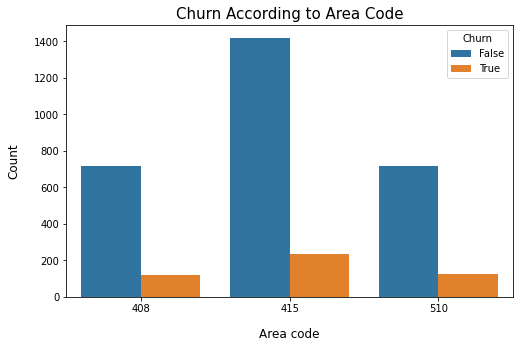

In [ ]:
#setting figure size
fig = plt.figure(figsize=(8,5))

#count plot to display Churn According to Area code
sns.countplot(data=telecom_data, x='Area code', hue='Churn')
plt.xlabel("Area code", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Churn According to Area Code", fontsize = 15)
plt.show()

Inference:

1. Orange S.A. has more customers in San Francisco  as compared to San Jose and City of Oakland.

According to my hypothesis:

1. Network upgradation is suggested in San Jose and City of Oakland to increase the customers.





# **Churn According to International Plan**

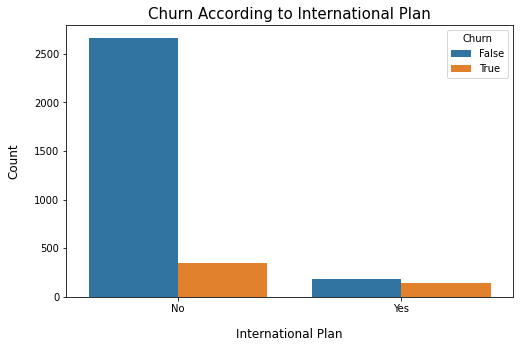

In [ ]:
#setting figure size
fig = plt.figure(figsize=(8,5))

#count plot to display Churn According to International Plan
sns.countplot(data=telecom_data, x='International plan', hue='Churn')
plt.xlabel("International Plan", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Churn According to International Plan", fontsize = 15)
plt.show()

Inference:

1. Customers with International plan has more churn rate than customers who are not having International plans.

According to my hypothesis:

1. Network upgradation is suggested to reduce churn rate.

# **Checking Voice-Mail Feature**

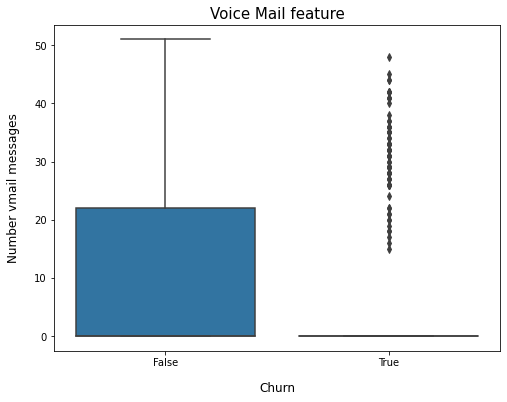

In [ ]:
#checking voice mail features

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Number vmail messages'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Number vmail messages", labelpad=14, fontsize = 12)
plt.title("Voice Mail feature", fontsize = 15)
plt.show()

Inference:

1. From above we can observe that there is a higher churn for customers who are using more than 20 voice-mail messages.

2. Certainly, the churn is indicating that we need to improve our voice-mail feature or set a limit and then check whether a customer is retained.

According to my hypothesis :

1. Setting a limit upto 22 voice mails on voice mail service.

2. Improving voice-mail service.

3. There is a quality drop in voice-mail after 22 voice mails. 

# **Total Day Minutes affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average number of minutes in morning

print('Maximum number of minutes:',telecom_data['Total day minutes'].max())
print('Minimum number of minutes:',telecom_data['Total day minutes'].min())
print('Average number of minutes:',telecom_data['Total day minutes'].mean())

Maximum number of minutes: 350.8
Minimum number of minutes: 0.0
Average number of minutes: 179.77509750975116


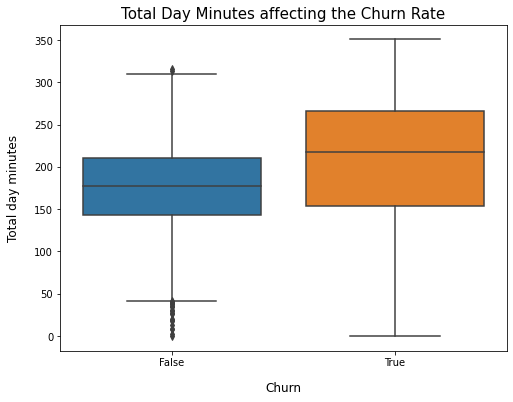

In [ ]:
#Total Day Minutes affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total day minutes'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total day minutes", labelpad=14, fontsize = 12)
plt.title("Total Day Minutes affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1. From above boxplot, we can observe that the customer who spends more than 225 minutes are more likely to switch to other operator.

According to my hypothesis:

1. One of the major reason for customer churn could be network disturbance during calls.
2. Network improvement or smarter technology is required to improve voice quality.

# **Total Day Calls affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average number of calls in morning

print('Minimum number of calls:',telecom_data['Total day calls'].min())
print('Maximum number of calls:',telecom_data['Total day calls'].max())
print('Average number of calls:',telecom_data['Total day calls'].mean())

Minimum number of calls: 0
Maximum number of calls: 165
Average number of calls: 100.43564356435644


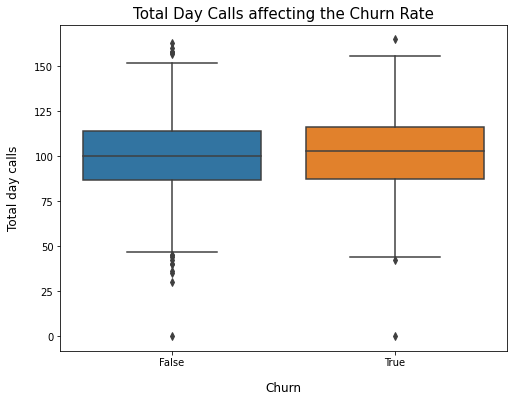

In [ ]:
#Total Day Calls affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total day calls'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total day calls", labelpad=14, fontsize = 12)
plt.title("Total Day Calls affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1. From above boxplot, we can observe that the customers with average of more than 100 calls are more likely to churn.

According to my hypothesis:

1. Need to improve on call drops as it could be a reason for more number of calls in morning.

# **Total Day Charge affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average call charge in morning

print('Maximum call charge in morning:',telecom_data['Total day charge'].max())
print('Minimum call charge in morning:',telecom_data['Total day charge'].min())
print('Average call charge in morning:',telecom_data['Total day charge'].mean())

Maximum call charge in morning: 59.64
Minimum call charge in morning: 0.0
Average call charge in morning: 30.562307230723093


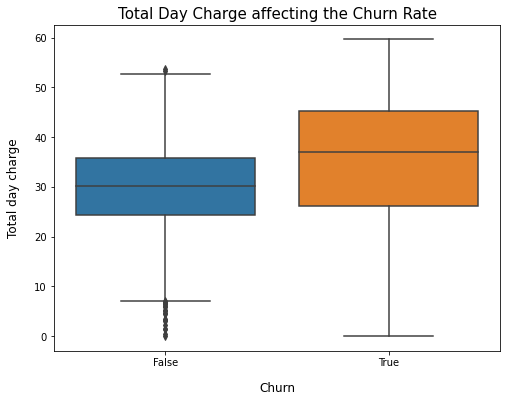

In [ ]:
#Total Day Charge affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total day charge'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total day charge", labelpad=14, fontsize = 12)
plt.title("Total Day Charge affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1. From above boxplot, we can observe that customers who spend more time(thereby paying higher charges) on the network are more likely to churn.

According to my hypothesis:

1. Need of price optimization.
2. Corporation can include discount in pricing strategy for the customers who are spending more time on the network.

# **Total Evening Minutes affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average number of minutes in evening

print('Maximum number of minutes:',telecom_data['Total eve minutes'].max())
print('Minimum number of minutes:',telecom_data['Total eve minutes'].min())
print('Average number of minutes:',telecom_data['Total eve minutes'].mean())

Maximum number of minutes: 363.7
Minimum number of minutes: 0.0
Average number of minutes: 200.98034803480346


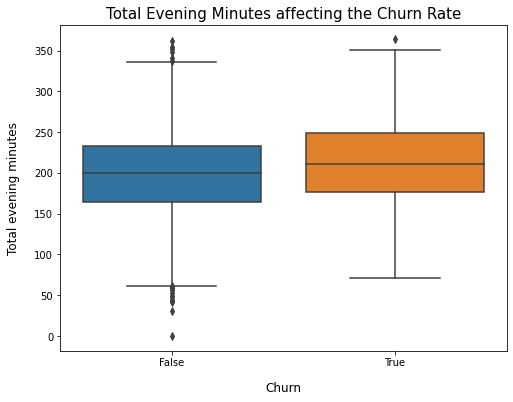

In [ ]:
#Total Evening Minutes affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total eve minutes'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total evening minutes", labelpad=14, fontsize = 12)
plt.title("Total Evening Minutes affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1. From above boxplot, we can observe that the customer who spends 235 minutes or more are more likely to switch to other operator.


According to my hypothesis:

1. One of the major reason for customer churn could be network disturbance during calls.
2. Network improvement or smarter technology is required to improve voice quality.

# **Total Evening Calls affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average number of calls in evening

print('Maximum number of calls:',telecom_data['Total eve calls'].max())
print('Minimum number of calls:',telecom_data['Total eve calls'].min())
print('Average number of calls:',telecom_data['Total eve calls'].mean())

Maximum number of calls: 170
Minimum number of calls: 0
Average number of calls: 100.11431143114311


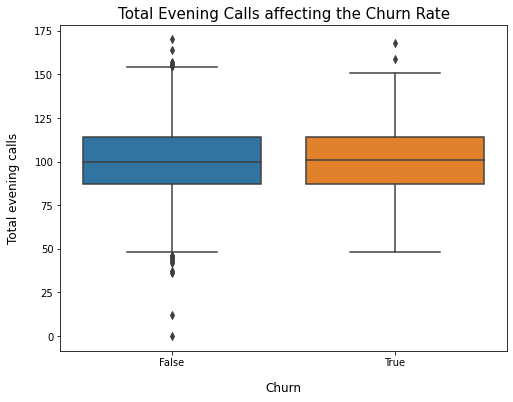

In [ ]:
#Total Evening Calls affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total eve calls'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total evening calls", labelpad=14, fontsize = 12)
plt.title("Total Evening Calls affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1. From above boxplot, we can observe that on an average 100 calls are made which is a good indication for the corporation.

2. We can also observe that the customers with average of more than 100 calls are more likely to churn due to call drop.

According to my hypothesis:

1. Need to improve on call drops as it could be a reason for more number of calls in evening.

# **Total Evening Charge affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average call charge in evening

print('Maximum call charge in evening:',telecom_data['Total eve charge'].max())
print('Minimum call charge in evening:',telecom_data['Total eve charge'].min())
print('Average call charge in evening:',telecom_data['Total eve charge'].mean())

Maximum call charge in evening: 30.91
Minimum call charge in evening: 0.0
Average call charge in evening: 17.083540354035392


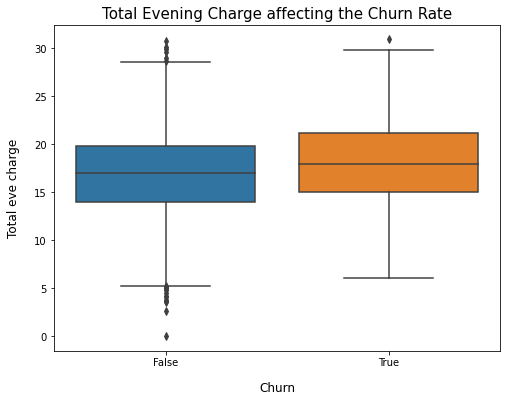

In [ ]:
#Total Evening Charge affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total eve charge'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total eve charge", labelpad=14, fontsize = 12)
plt.title("Total Evening Charge affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1. Optimization of charges would lead to loyal customers.

According to my hypothesis:

1. As the average charge of churn and non-churn customer is almost same, where the reason for churn could be that some customers are not finding the network quality worth it.
2. Need of price optimization.
3. Network upgradation is suggested.

# **Total Night Minutes affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average number of minutes in night

print('Maximum number of minutes:',telecom_data['Total night minutes'].max())
print('Minimum number of minutes:',telecom_data['Total night minutes'].min())
print('Average number of minutes:',telecom_data['Total night minutes'].mean())

Maximum number of minutes: 395.0
Minimum number of minutes: 23.2
Average number of minutes: 200.87203720372048


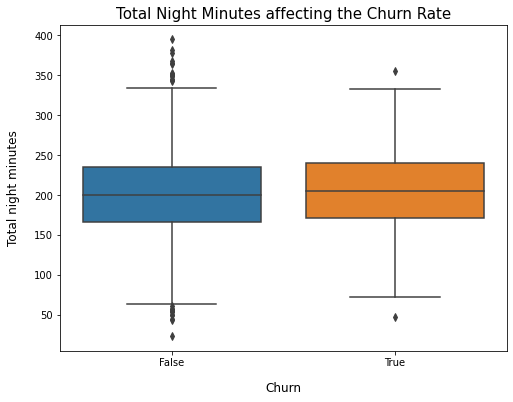

In [ ]:
#Total Night Minutes affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total night minutes'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total night minutes", labelpad=14, fontsize = 12)
plt.title("Total Night Minutes affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1. From above boxplot, we can observe that average churn and non-churn rate is almost equal.

2. Customers who are not churning are spending more minutes.

According to my hypothesis:

1. Network upgradation can retain the customers.

# **Total Night Calls affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average number of calls in night

print('Maximum number of calls:',telecom_data['Total night calls'].max())
print('Minimum number of calls:',telecom_data['Total night calls'].min())
print('Average number of calls:',telecom_data['Total night calls'].mean())

Maximum number of calls: 175
Minimum number of calls: 33
Average number of calls: 100.10771077107711


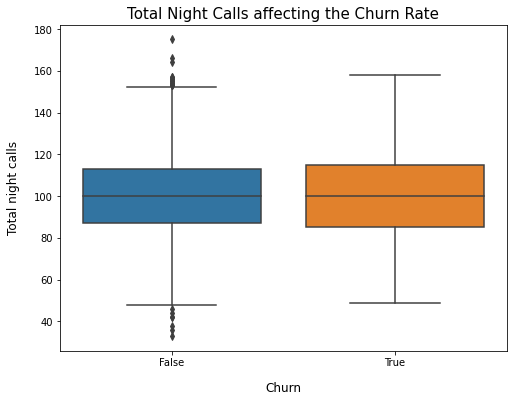

In [ ]:
#Total Night Calls affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total night calls'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total night calls", labelpad=14, fontsize = 12)
plt.title("Total Night Calls affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1. From above boxplot, we can observe that the IQR(Interquartile Range) of night calls are more for churned customers.

According to my hypothesis:

1. Need to improve on call drops as it could be a reason for more number of calls in night.

# **Total Night Charge affecting the churn rate**

In [ ]:
#Printing maximum, minimum and average call charge in night

print('Maximum call charge in night:',telecom_data['Total night charge'].max())
print('Minimum call charge in night:',telecom_data['Total night charge'].min())
print('Average call charge in night:',telecom_data['Total night charge'].mean())

Maximum call charge in night: 17.77
Minimum call charge in night: 1.04
Average call charge in night: 9.039324932493264


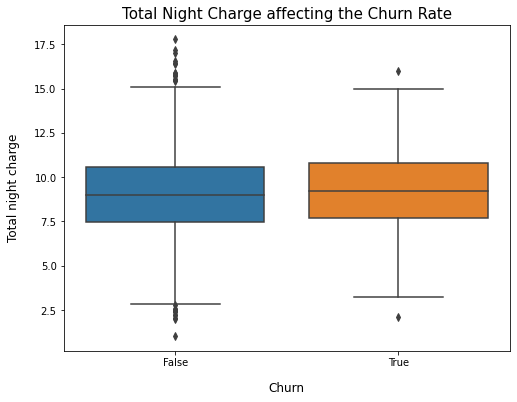

In [ ]:
#Total Night Charge affecting the churn rate

#setting figure size
fig = plt.figure(figsize=(8,6))

#Creating boxplot
sns.boxplot(y= telecom_data['Total night charge'], x = telecom_data['Churn'])
plt.xlabel("Churn", labelpad=14, fontsize = 12)
plt.ylabel("Total night charge", labelpad=14, fontsize = 12)
plt.title("Total Night Charge affecting the Churn Rate", fontsize = 15)
plt.show()

Inference:

1 Optimization of charges would lead to loyal customers.

According to my hypothesis:

1. As the average charge of churn and non-churn customer is almost same, where the reason for churn could be that some customers are not finding the network quality worth it.

2. Price optimization and network upgradation is suggested.

# **Comparison between total charge and total minutes**

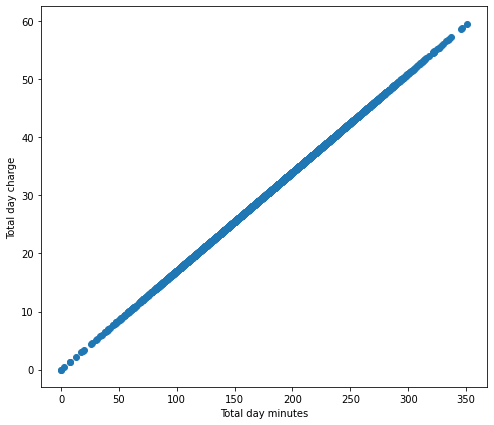

In [ ]:
#day

plt.figure(figsize=(8,7))
plt.scatter(x='Total day minutes',y='Total day charge',data=telecom)
plt.xlabel('Total day minutes')
plt.ylabel('Total day charge')
plt.show()

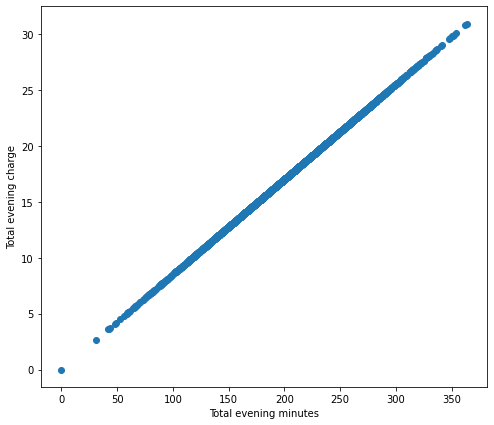

In [ ]:
#evening

plt.figure(figsize=(8,7))
plt.scatter(x='Total eve minutes',y='Total eve charge',data=telecom)
plt.xlabel('Total evening minutes')
plt.ylabel('Total evening charge')
plt.show()

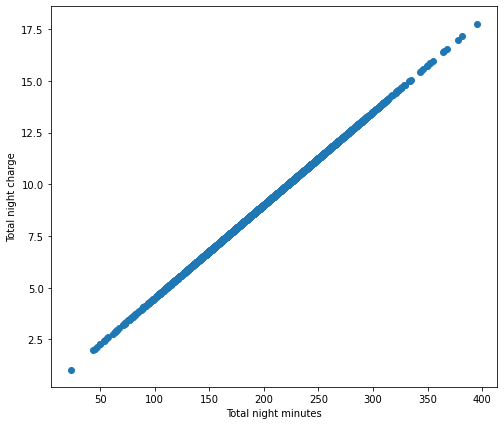

In [ ]:
#night

plt.figure(figsize=(8,7))
plt.scatter(x='Total night minutes',y='Total night charge',data=telecom)
plt.xlabel('Total night minutes')
plt.ylabel('Total night charge')
plt.show()

# **Checking frequency distribution of all data using histogram**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


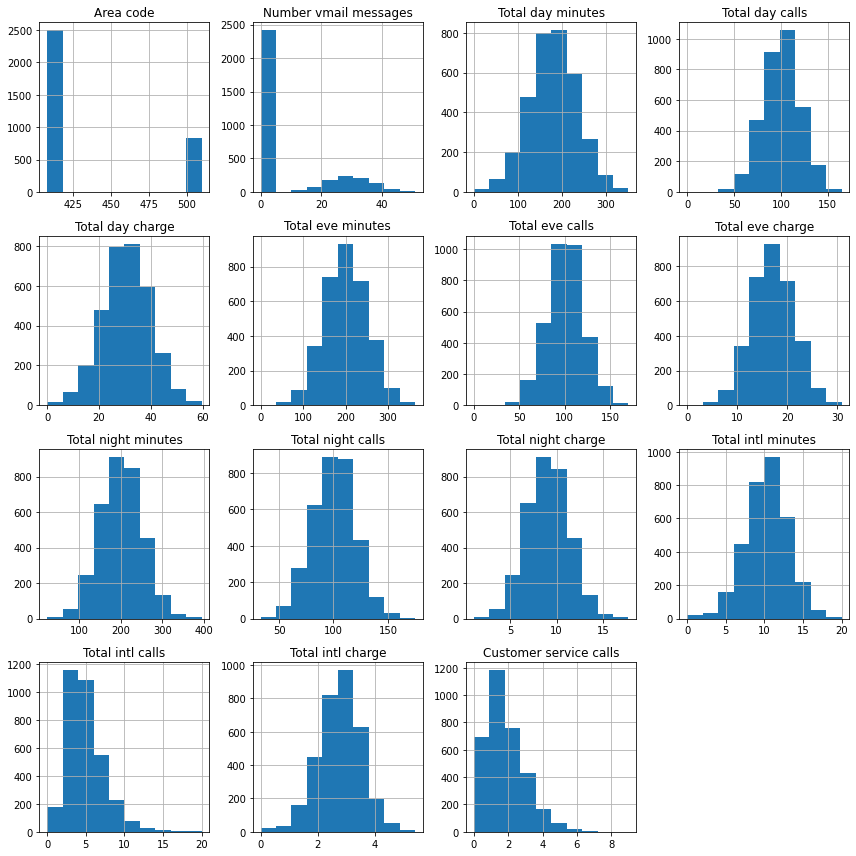

In [ ]:
#Frequency distribution of all data
#Plotting the data to visualize their distribution

fig, ax = plt.subplots(figsize=(12,12))
pd.DataFrame.hist(telecom_data, ax=ax)
plt.tight_layout()
plt.show()

Inference:

Area code, Number vmail messages, Total intl calls and Customer service calls are not distributed uniformly whereas others are distributed uniformly.